In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(3000, 2)


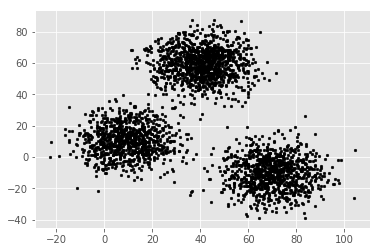

In [2]:
# Importing the dataset

data = pd.read_csv('dummy.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['V1'].values

f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [3]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.355743e+05
4,5,4.689769e+05
5,6,4.077301e+05
6,7,3.675449e+05
7,8,3.116519e+05
8,9,2.716137e+05


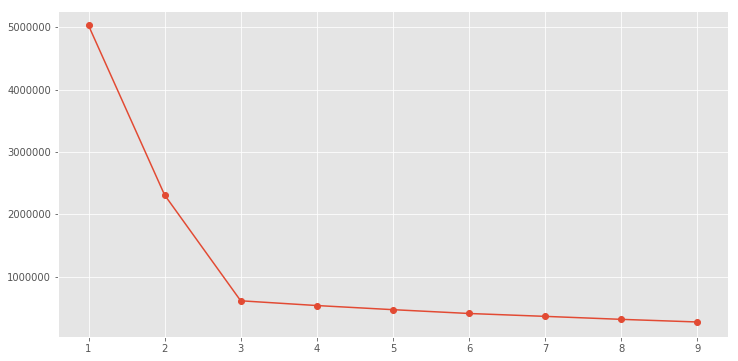

In [4]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [5]:


# Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 32.27005102  58.9324465 ]
 [ 61.67050215 -10.0769259 ]
 [  9.32265759  10.65444646]
 [ 48.50028605  60.30815331]
 [ 78.51362742 -10.10562131]]


In [6]:
colnames = ["col1", "col2"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction



In [7]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

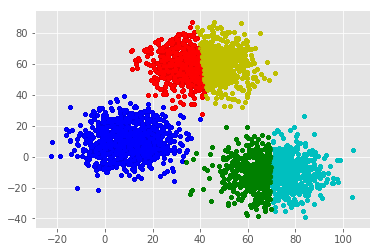

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


In [39]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

In [40]:
# Importing the dataset

data = pd.read_csv('dummy.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['V1'].values

f2 = data['V2'].values

X = pd.DataFrame(f2)

Input Data and Shape
(3000, 2)


In [41]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,1,3.025030e+06
1,2,4.868842e+05
2,3,2.298635e+05
3,4,1.595235e+05
4,5,9.815315e+04
5,6,7.419928e+04
6,7,5.757589e+04
7,8,4.402741e+04
8,9,3.584452e+04


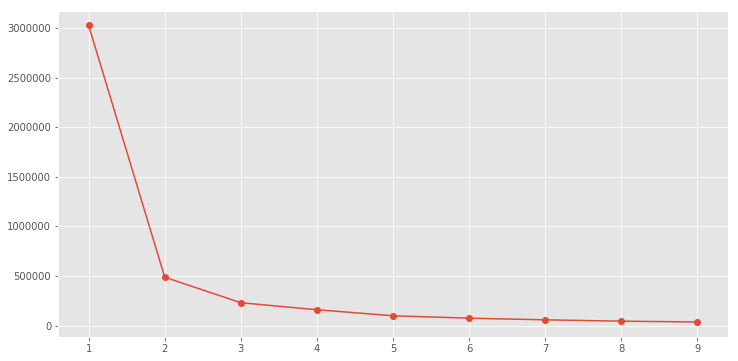

In [42]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [43]:


# Number of clusters

kmeans = KMeans(n_clusters=2)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.49334335]
 [59.08697395]]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


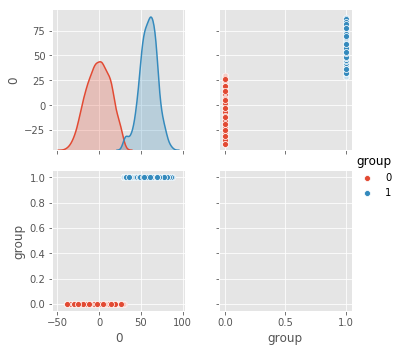

In [44]:
prediction= kmeans.predict(X)
X["group"] = prediction
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(X,diag_kind='kde',hue='group')